In [40]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex

In [38]:
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc


# in this case, the oracle needs to mark state |11>, which can be done by CZ
def oracle(qc):
    qc.cz(0, 1)
    return qc


# you need to apply reflection U_s to state |s>, where U_s = 2|s><s| - Identity
# by applying H-gates to |s> you obtain |0>
# then you apply circuit that adds a negative phase to orthogonal states to |0> = |00>
# that is done by qc.z([0, 1]) and qc.cz(0, 1)
#     > U_0 = Z*CZ: U_0 [(1/2) * (|00> + |01> + |10> + |11>)] = (1/2) (|00> - |01> - |10> - |11>)
# and then you apply H-gates again to recover state |s>
# U_s = H*Z*CZ*H
def diffusion_operator(qc):
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)
    qc.h([0, 1])
    return qc

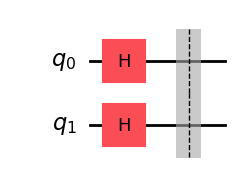

In [34]:
n = 2
grover_circuit = QuantumCircuit(n)

# initialize to superposition
grover_circuit = initialize_s(grover_circuit, [qubit for qubit in range(n)])
grover_circuit.barrier()
grover_circuit.draw(output='mpl')

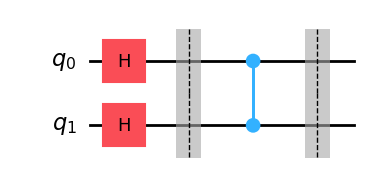

In [35]:
# apply oracle
grover_circuit = oracle(grover_circuit)
grover_circuit.barrier()
grover_circuit.draw(output='mpl')

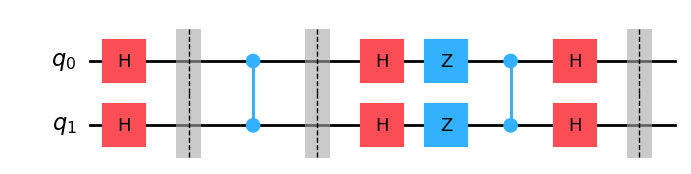

In [36]:
# apply diffusion operator
grover_circuit = diffusion_operator(grover_circuit)
grover_circuit.barrier()
grover_circuit.draw(output='mpl')

In [41]:
## SIMULATOR
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
array_to_latex(statevec, prefix="|\\psi\\rangle = ")

<IPython.core.display.Latex object>

In [42]:
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit)